# Investigation of the traffic patterns of different application-layer protocols

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [31]:
def read_data(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f:
            time_str, value_str = line.strip().split(',')
            time = float(time_str)
            value = float(value_str)
            data.append([time, value])
    return data

In [32]:
def transform_time_differences(data):
    data = np.array(data)
    
    # Calculate differences in the first column (time differences)
    #time_differences = np.diff(data[:, 0])
    #time_differences = np.insert(time_differences, 0, 0)
    transformed_data = np.column_stack((data[:, 0], data[:, 1]))

    return transformed_data

In [33]:

def plot_payload_stats(payload_sizes):
    payload_sizes = np.array(payload_sizes)
    # payload_sizes = payload_sizes[payload_sizes > 0]  # filter out zero sizes

    # PDF using Gaussian Kernel Density Estimation
    pdf = gaussian_kde(payload_sizes)
    x = np.linspace(min(payload_sizes), max(payload_sizes), 1000)
    pdf_values = pdf(x)

    # CDF using cumulative sum of the PDF
    cdf_values = np.cumsum(pdf_values)
    cdf_values /= cdf_values[-1]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(x, pdf_values, label='PDF')
    plt.title('PDF of Payload Sizes')
    plt.xlabel('Payload Size')
    plt.ylabel('Density')

    plt.subplot(1, 2, 2)
    plt.plot(x, cdf_values, label='CDF', color='r')
    plt.title('CDF of Payload Sizes')
    plt.xlabel('Payload Size')
    plt.ylabel('Cumulative Probability')

    plt.tight_layout()
    plt.show()

def plot_inter_arrival_stats(packet_times):
    packet_times = np.array(packet_times)
    inter_arrival_times = packet_times  # calculate inter-arrival times

    # PDF using Gaussian Kernel Density Estimation
    pdf = gaussian_kde(inter_arrival_times)
    x = np.linspace(min(inter_arrival_times), max(inter_arrival_times), 1000)
    pdf_values = pdf(x)

    # CDF using cumulative sum of the PDF
    cdf_values = np.cumsum(pdf_values)
    cdf_values /= cdf_values[-1]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(x, pdf_values, label='PDF')
    plt.title('PDF of Inter-Arrival Times')
    plt.xlabel('Inter-Arrival Time (seconds)')
    plt.ylabel('Density')

    plt.subplot(1, 2, 2)
    plt.plot(x, cdf_values, label='CDF', color='r')
    plt.title('CDF of Inter-Arrival Times')
    plt.xlabel('Inter-Arrival Time (seconds)')
    plt.ylabel('Cumulative Probability')

    plt.tight_layout()
    plt.show()

In [34]:
def plot_time_series(data):
    data = np.array(data)
    plt.figure(figsize=(12, 6))
    plt.plot(data[:, 0], data[:, 1])
    plt.title('Time Series of Payload Sizes')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Payload Size (bytes)')
    plt.show()


In [35]:
def get_data(filename):
    data = read_data(filename)
    #transformed_data = transform_time_differences(data)
    #return transformed_data
    return np.array(data)

## Investigation of HTTP traffic

In [36]:
# Read data from the file
filename = 'HTTPCapture.txt'
HTTP_data = get_data(filename)
print(HTTP_data)

HTTP_data

[[0.000000e+00 1.100000e+02]
 [2.087997e+00 1.100000e+02]
 [1.898600e-02 1.100000e+02]
 ...
 [2.800000e-05 1.238000e+03]
 [0.000000e+00 7.230000e+02]
 [1.000000e-04 0.000000e+00]]


array([[0.000000e+00, 1.100000e+02],
       [2.087997e+00, 1.100000e+02],
       [1.898600e-02, 1.100000e+02],
       ...,
       [2.800000e-05, 1.238000e+03],
       [0.000000e+00, 7.230000e+02],
       [1.000000e-04, 0.000000e+00]])

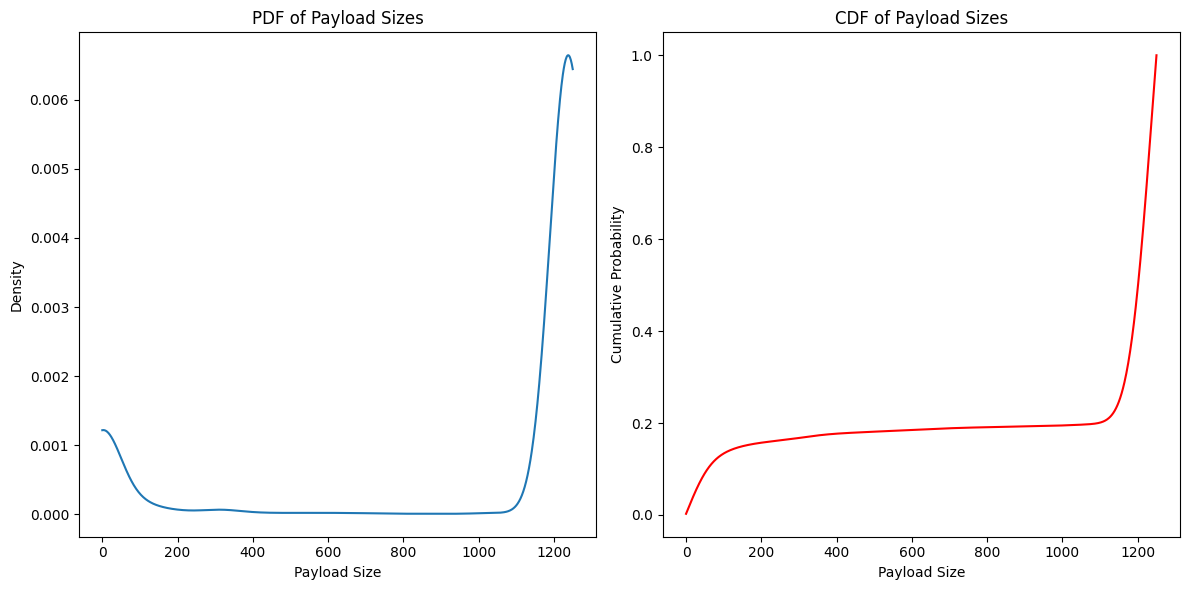

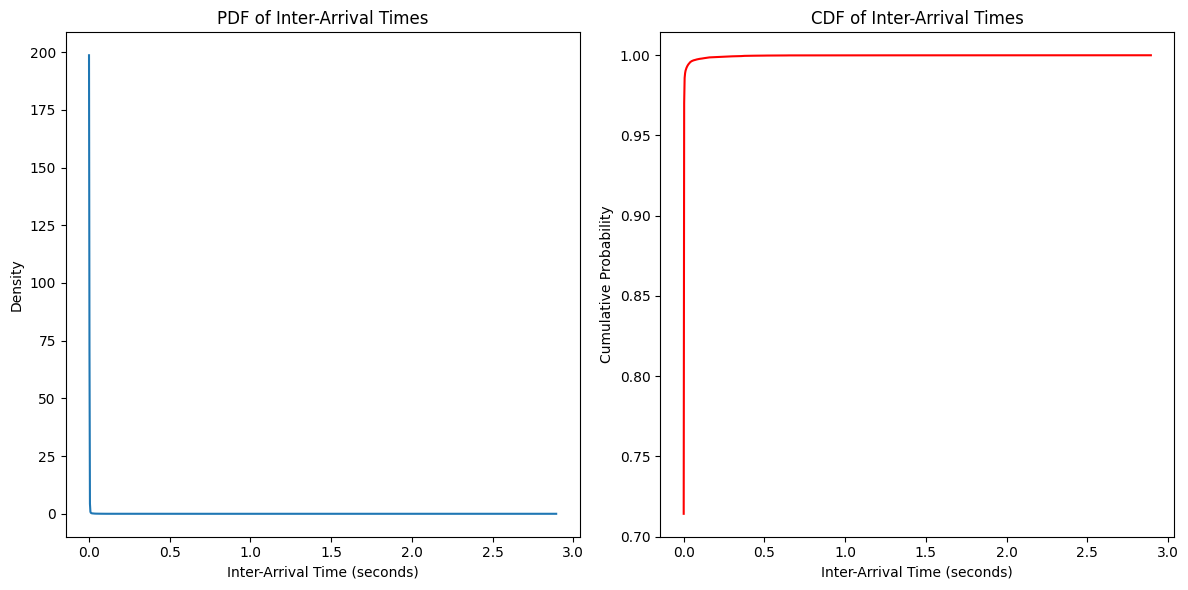

In [37]:
# Plot the payload size statistics
plot_payload_stats(HTTP_data[:, 1])

# Plot the inter-arrival time statistics
plot_inter_arrival_stats(HTTP_data[:, 0])

## Investigation of FTP traffic

In [38]:
# Read data from the file
filename = 'FTPCapture.txt'
FTP_data = get_data(filename)

FTP_data

array([[0.      , 0.      ],
       [0.012859, 0.      ],
       [0.287671, 0.      ],
       ...,
       [0.002396, 0.      ],
       [0.999011, 0.      ],
       [0.001281, 0.      ]])

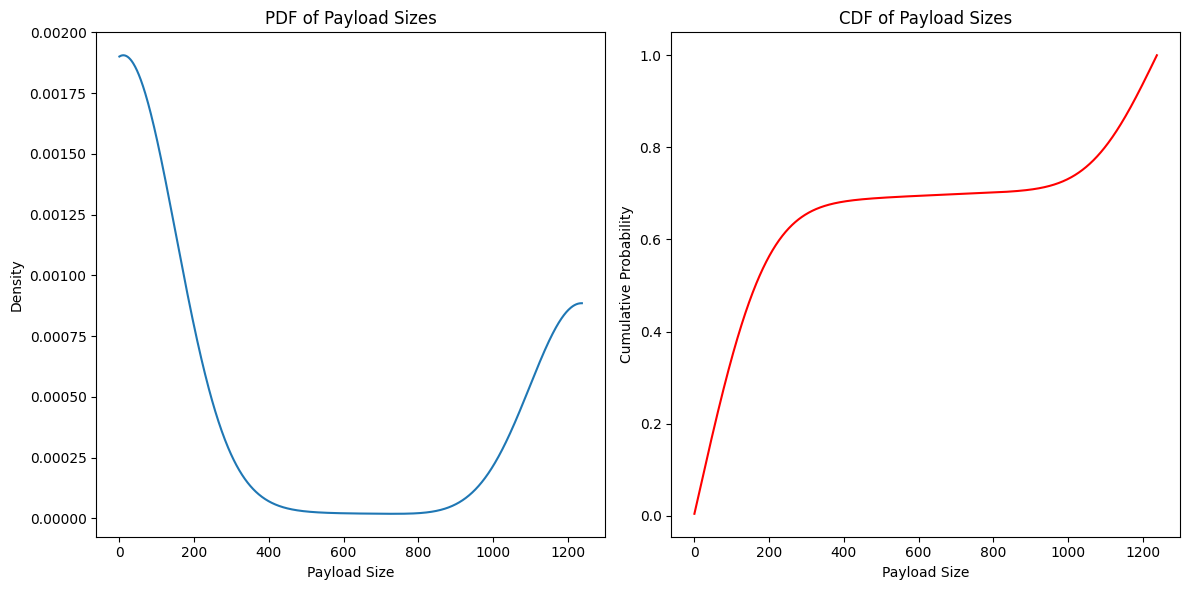

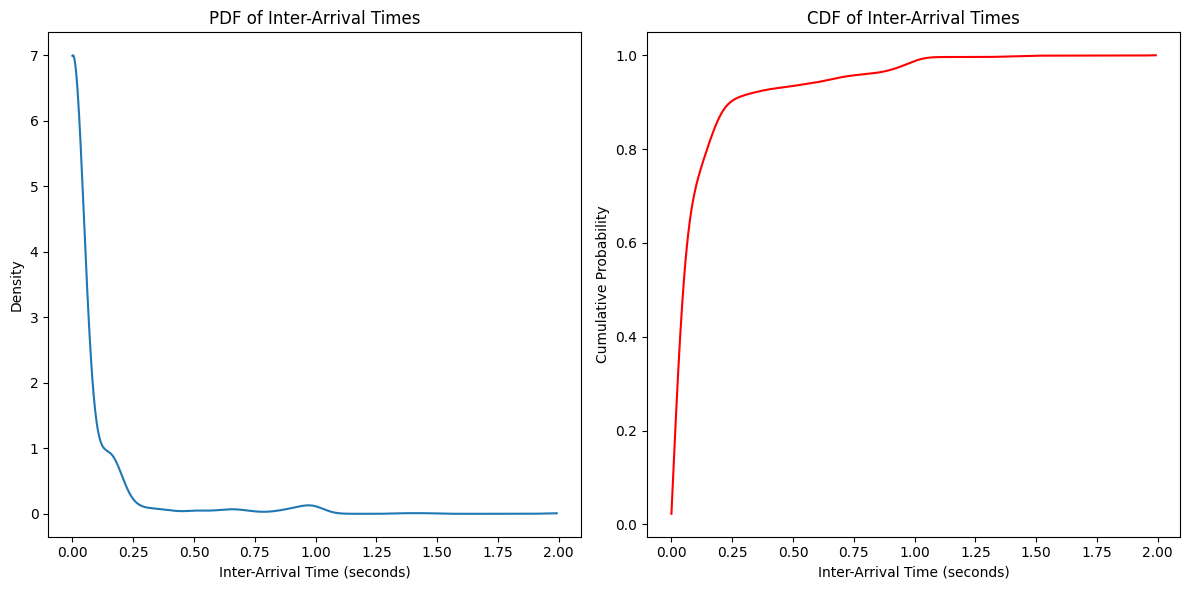

In [39]:
# Plot the payload size statistics
plot_payload_stats(FTP_data[:, 1])

# Plot the inter-arrival time statistics
plot_inter_arrival_stats(FTP_data[:, 0])

## Investigation of VolP traffic

In [40]:
# Read data from the file
filename = 'VoIPCapture.txt'
VoIP_data = get_data(filename)

VoIP_data

array([[0.000e+00, 8.100e+01],
       [1.000e-06, 0.000e+00],
       [1.465e-03, 1.136e+03],
       ...,
       [1.000e-06, 1.036e+03],
       [0.000e+00, 1.330e+02],
       [3.582e-03, 1.238e+03]])

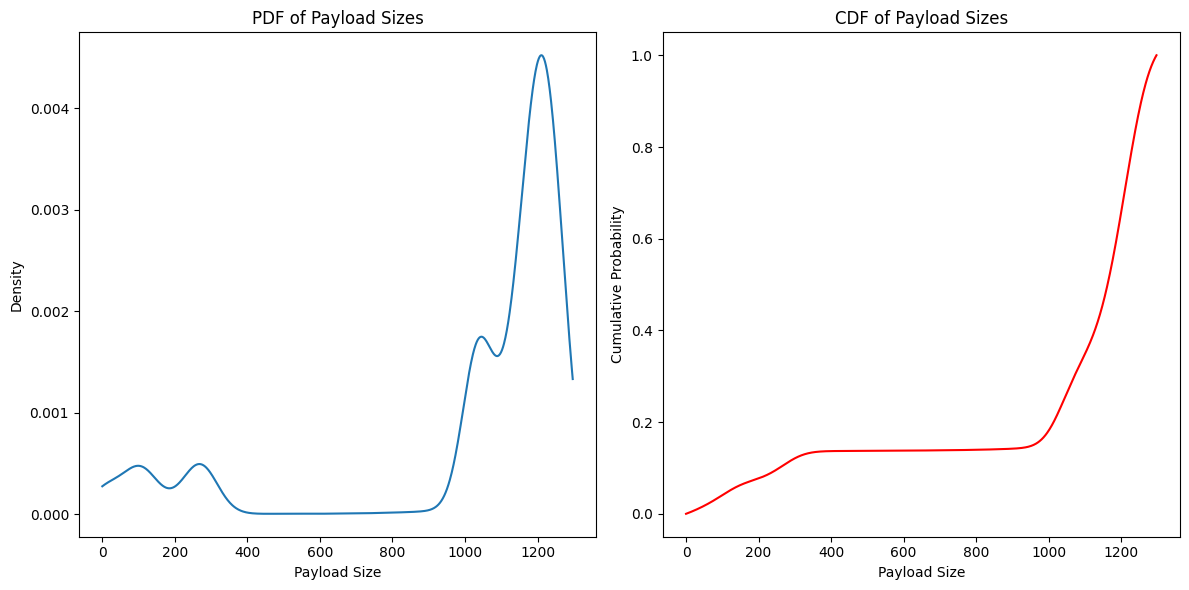

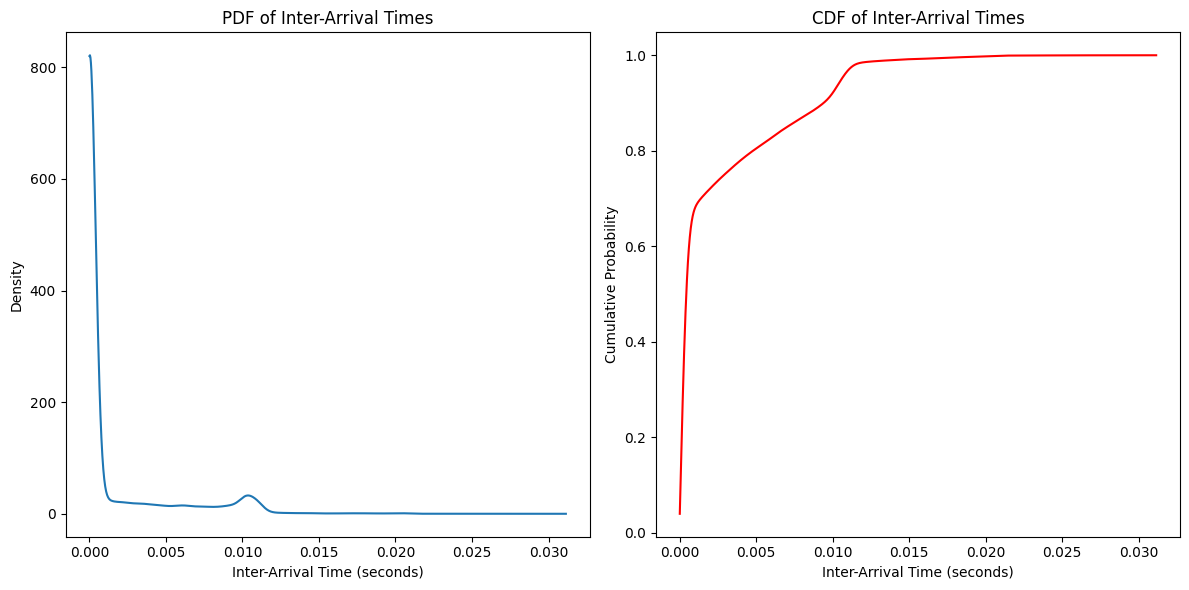

In [41]:
# Plot the payload size statistics
plot_payload_stats(VoIP_data[:, 1])

# Plot the inter-arrival time statistics
plot_inter_arrival_stats(VoIP_data[:, 0])

## Investigation of BitTorrent traffic

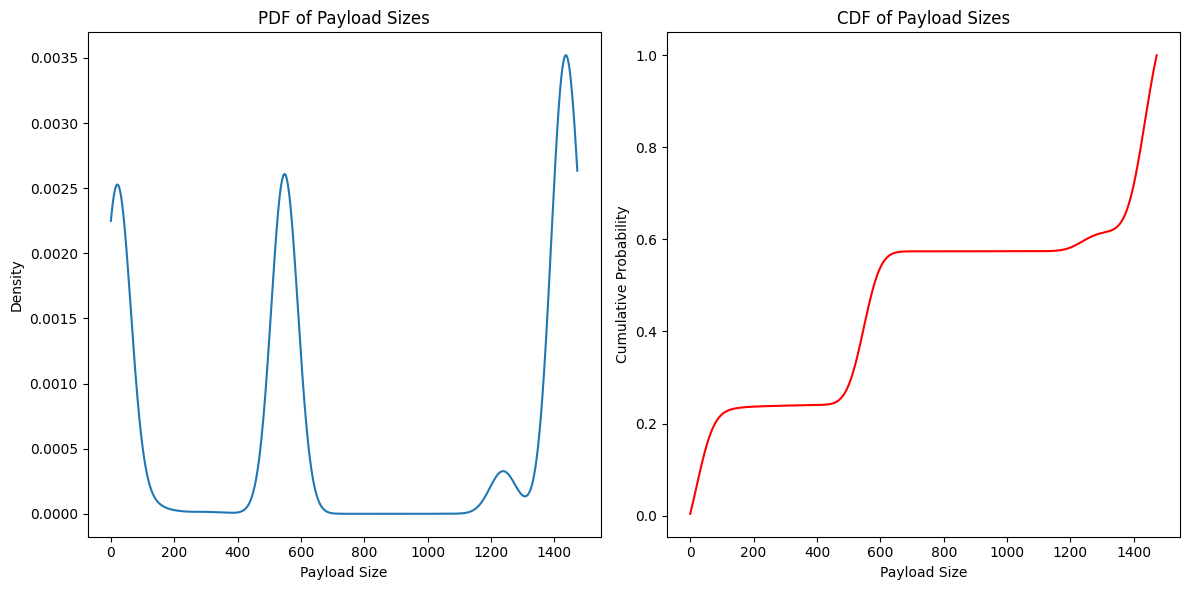

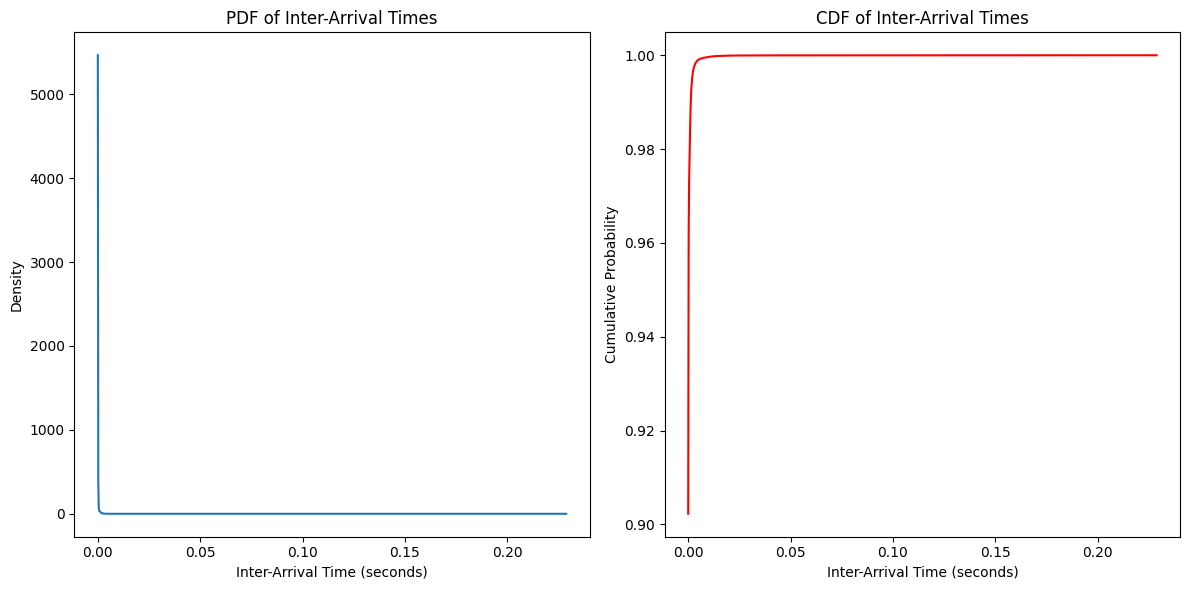

In [42]:



filename = 'BitTorrentComplete.txt'
BitTorrent_data = get_data(filename)

plot_payload_stats(BitTorrent_data[:, 1])

# Plot the inter-arrival time statistics
plot_inter_arrival_stats(BitTorrent_data[:, 0])